# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Functions 
__frange(n, stop, step)__   *(Helper Function)*<br>
\- A substite function for range() that works with floats instead of integers.<br>
\- Inputs are: __n__ the first number in the desired list, __stop__ the end of the list and __step__ the step between each element in the list.<br>
\- Output is a list.

In [2]:
def frange(n, stop, step):
    list = []
    while n < stop:
        list.append(float(n))
        n += step
    return list

__test_integral(integral_func, N, dp)__<br>
\- A test function which tests the result of a numerical integration function against the identity: $\int_{0}^{\pi} sin^{2}(x)dx=\frac{\pi}{2}$.<br>
\- Inputs are: __integral_func__ the function used for numerical integration, __N__ the number of points used in the function and __dp__ the decimal places to which the function should precise to.<br>
\- Output is a boolean which represents whether the numerical integration gave the expected result or not.

In [3]:
def test_integral(integral_func, N, dp):
    
    f = lambda x: np.sin(x) ** 2 # Sin(x)^2 from the identity
    
    integral_result = integral_func(f, 0, np.pi, 200)
    integral_result = np.round(integral_result, dp)
    
    correct_result = np.round(np.pi / 2, dp)
    
    return integral_result == correct_result

__test_error_func(err_func, dp)__<br>
\- A test function which tests the result of an implementation of the error function against the identity: $erf(\pi)=1$.<br>
\- Inputs are: __err_func__ the function used as an implementation of the error function and __dp__ the decimal places to which the function should precise to.<br>
\- Output is a boolean which represents whether the implementation of the error function gave the expected result or not.

In [4]:
def test_error_func(err_func, dp):
    
    func_result = err_func(np.pi)
    func_result = np.round(func_result, dp)
    
    correct_result = np.round(1.0, dp)
    
    return func_result == correct_result

__trapezium_integration(func, a, b, N)__<br>
\- A function that uses the trapezium rule to numerically integrate a function. Trapezium rule: $\int_{a}^{b} f(x)dx=\frac{h}{2}\left[f(a)+f(b)+2\sum_{i=1}^{n-1}f(a+ih)\right]$.<br>
\- Inputs are: __func__ the function to be numerically integrated, __a__ the lower limit of the integral, __b__ the upper limit of the integral and __N__ the number of points used to approximate the integral.<br>
\- Output is a float which is the approximate area of the function __f__ between the points __a__ and __b__.

In [5]:
def trapezium_integration(func, a, b, N):
    
    h = (b - a) / N # Calculate the step size
    sum_of_inbetween_points = 0
    
    # Add up all the values of the points inbetween a and b
    for x in frange(a + h, b, h):
        sum_of_inbetween_points += func(x)
    
    # Use the trapezium rule to return the approximate area
    return (h / 2) * (func(a) + func(b) + (2 * sum_of_inbetween_points))

__err_func(z)__<br>
\- A function which implements the error function using the error function formula. Formula: $erf(z)=\frac{2}{\sqrt{\pi}}\int_{0}^{z}e^{-x^2}dx$.<br>
\- Input is __z__ the upper limit of the integral.<br>
\- Output is a float which is the area of the error function from 0 to the point __z__.

In [6]:
def err_func(z):
    
    f = lambda x: np.e ** -(x ** 2)
    root_pi = np.power(np.pi, 0.5)
    
    integral = trapezium_integration(f, 0, z, 1000)
    
    return (2 / root_pi) * integral

# Integration of $sin^{2}(x)$
#### Inputs:

In [9]:
a = input("Please input a value for a ... ")
b = input("Please input a value for b ... ")
N = input("Please input a value for the points between the values ... ")

a = float(a)
b = float(b)
N = int(N)

print("\nThe values you have inputed are: a = {0}, b = {1}, N = {2}".format(a,b,N))

Please input a value for a ... 0
Please input a value for b ... 4
Please input a value for the points between the values ... 5

The values you have inputed are: a = 0.0, b = 4.0, N = 5


#### Outputs:


The test to see if the integration works returned: True

Display of numerical integration using trapezium rule:


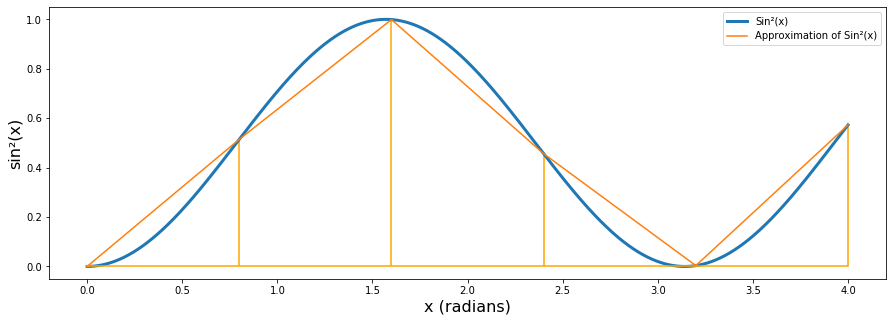


The area between the points a = 0.0 and b = 4.0 is 1.8078.


In [10]:
# Function to be integrated ---------------------------------------------------

f = lambda x: np.sin(x) ** 2

# Test to see if function work ------------------------------------------------

integration_test_result = test_integral(trapezium_integration, 200, 12)
print("\nThe test to see if the integration works returned: {0}".format(integration_test_result))

# Matplotlib Graph of the integration -----------------------------------------

normal_x = np.linspace(a, b, num=1000) # Create a list of x values for a smooth display of the function sin(x)^2

h = (b - a) / N

# Creat a list of x values to show the trapezoided approximation of the function sin(x)^2
# For small values of h the rounding causes b + h to overshoot the graph so b is used instead
if (h < 0.24):
    trap_x = frange(a, b, h)
else:
    trap_x = frange(a, b + h, h)

print("\nDisplay of numerical integration using trapezium rule:")

plt.figure(figsize=(15,5))

plt.plot(normal_x, f(normal_x), label='Sin\u00b2(x)', lw=3)
plt.plot(trap_x, f(trap_x), label='Approximation of Sin\u00b2(x)')

if (h >= 0.05): # If the steps aren't too small then create a stem graph to represent the area
    plt.stem(trap_x, f(trap_x),linefmt='orange', markerfmt=' ', basefmt='orange', use_line_collection=True)

plt.xlabel('x (radians)', fontsize=16)
plt.ylabel('sin\u00b2(x)', fontsize=16)
plt.legend()
plt.show()

# Result of numerical integration --------------------------------------------

integral_result = trapezium_integration(f, a, b, N)
print("\nThe area between the points a = {0} and b = {1} is {2:0.4f}.".format(a, b, integral_result))

# Implementation of erf(z)
#### Input:

In [11]:
z = input("Please input a value for z ... ")
z = float(z)
print("\nThe value you have inputed is: z = ",z)

Please input a value for z ... .5

The value you have inputed is: z =  0.5


#### Output:

In [12]:
# Test to see if function work ------------------------------------------------
err_func_test_result = test_error_func(err_func, 12)
print("\nThe test to see if the integration works returned: {0}".format(integration_test_result))

# Value of err_func -----------------------------------------------------------

value = err_func(z)
print("\nThe value of the error function at z = {0} is {1:0.4f}.".format(z, value))


The test to see if the integration works returned: True

The value of the error function at z = 0.5 is 0.5205.
